## What is linear regression?
In simple terms, linear regression is a method of finding the best straight line fitting to the given data, 
i.e. finding the best linear relationship between the independent and dependent variables.
In technical terms, linear regression is a machine learning algorithm that finds the best linear-fit 
relationship on any given data, between independent and dependent variables. It is mostly done by the 
Sum of Squared Residuals Method.

In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, 
and nature of regression line is linear.


In [35]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
boston=load_boston()
type(boston)

sklearn.utils.Bunch

In [37]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
boston_df['price']=boston.target                    # to get dependent variable
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
x=boston_df.drop('price',axis=1)
x.head(3)
y=boston_df['price']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#80% training data , 20% test data

print(x_train[:5])

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
220   0.35809   0.0   6.20   1.0  0.507  6.951  88.5  2.8617   8.0  307.0   
71    0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873   4.0  305.0   
240   0.11329  30.0   4.93   0.0  0.428  6.897  54.3  6.3361   6.0  300.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605   5.0  311.0   
417  25.94060   0.0  18.10   0.0  0.679  5.304  89.1  1.6475  24.0  666.0   

     PTRATIO       B  LSTAT  
220     17.4  391.70   9.71  
71      19.2  376.94   9.88  
240     16.6  391.25  11.38  
6       15.2  395.60  12.43  
417     20.2  127.36  26.64  


In [43]:
# fitting the regression model
reg= LinearRegression()
reg= reg.fit(x_train,y_train)

In [44]:
print("a1=",reg.coef_)
print("a0=",reg.intercept_)

a1= [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]
a0= 38.09169492630278


In [60]:
#prediction
y_pred=reg.predict(x_test)
print(y_test)
print(y_pred)

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: price, Length: 102, dtype: float64
[24.88963777 23.72141085 29.36499868 12.12238621 21.44382254 19.2834443
 20.49647539 21.36099298 18.8967118  19.9280658   5.12703513 16.3867396
 17.07776485  5.59375659 39.99636726 32.49654668 22.45798809 36.85192327
 30.86401089 23.15140009 24.77495789 24.67187756 20.59543752 30.35369168
 22.41940736 10.23266565 17.64816865 18.27419652 35.53362541 20.96084724
 18.30413012 17.79262072 19.96561663 24.06127231 29.10204874 19.27774123
 11.15536648 24.57560579 17.5862644  15.49454112 26.20577527 20.86304693
 22.31460516 15.60710156 23.00363104 25.17247952 20.11459464 22.90256276
 10.0380507  24.28515123 20.94127711 17.35258791 24.52235405 29.95143046
 13.42695877 21.72673066 20.7897053  15.49668805 13.98982601 22.18377874
 17.73047814 21.58869165 32.90522136 31.11235671 17.73252635 32.76358681
 18.7124637  19.78693475 1

### ways of improving the accuracy of a linear regression model?
There could be multiple ways of improving the accuracy of a linear regression, most commonly used ways are as follows:
1.	Outlier Treatment:
-Regression is sensitive to outliers, hence it becomes very important to treat the outliers with appropriate values. 
Replacing the values with mean, median, mode or percentile depending on the distribution can prove to be useful.


In [46]:
from sklearn.metrics import r2_score,mean_squared_error

In [47]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)

RMSE= 5.783509315085134


In [61]:
r2= r2_score(y_test,y_pred)
print('regression score=',r2)

regression score= 0.589222384918251


### Overfitting:
reasons for overfitting:
1. insufficient data in training the model:
    to overcome this, we may need to use more data for training
2. imprper set of attributes are used or more weightage is given to less important attributes: 
    to overcome this, we may need to do regularization
    
    
    
    
### How to avoid Overfitting:

The commonly used methodologies are:

•	Cross- Validation: A standard way to find out-of-sample prediction error is to use 5-fold cross validation.

•	Early Stopping: Its rules provide us the guidance as to how many iterations can be run before learner begins to over-fit.

•	Pruning: Pruning is extensively used while building related models. It simply removes the nodes which add little predictive power for the problem in hand.

•	Regularization: It introduces a cost term for bringing in more features with the objective function. Hence it tries to push the coefficients for many variables to zero and hence reduce cost term.


In [59]:
y_pred_train=reg.predict(x_train)

r2_train= r2_score(y_train,y_pred_train)
print('regression score=',r2_train) #r2 for train data

regression score= 0.7730135569264234


from above we can see, 
r2 for test data is = 0.5892
r2 for train data is = 0.7730
so, this is an example of overfitting

increase the train data size to 85% then check the r2: for this, r2 value is degrading though increasing train data size. so 2nd reason for overfitting is the reason here

# Regularization

https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/


### What is the use of regularisation? Explain L1 and L2 regularisations.
Regularisation is a technique that is used to tackle the problem of overfitting of the model. 
When a very complex model is implemented on the training data, it overfits. 
At times, the simple model might not be able to generalise the data and the complex model overfits. 
To address this problem, regularisation is used.
Regularisation is nothing but adding the coefficient terms (betas) to the cost function so that the terms are 
penalised and are small in magnitude. This essentially helps in capturing the trends in the data and at the 
same time prevents overfitting by not letting the model become too complex.

•	L1 or LASSO regularisation: Here, the absolute values of the coefficients are added to the cost function. 
    This can be seen in the following equation; the highlighted part corresponds to the L1 or LASSO regularisation. 
    This regularisation technique gives sparse results, which lead to feature selection as well.
 
•	L2 or Ridge regularisation: Here, the squares of the coefficients are added to the cost function. 
    This can be seen in the following equation, where the highlighted part corresponds to the L2 or Ridge regularisation.
 


In [62]:
predictors= x_train.columns
predictors

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [63]:
coef = pd.Series(reg.coef_, predictors).sort_values()
coef

NOX       -16.123604
DIS        -1.386397
PTRATIO    -1.045921
LSTAT      -0.492793
CRIM       -0.119443
TAX        -0.010990
AGE        -0.003121
INDUS       0.005485
B           0.008110
ZN          0.044780
RAD         0.244178
CHAS        2.340804
RM          3.708709
dtype: float64

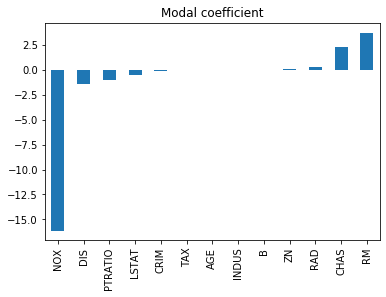

In [65]:
coef.plot(kind = 'bar',title = 'Modal coefficient')

## How to choose the value of the regularisation parameter (λ)?
Selecting the regularisation parameter is a tricky business. If the value of λ is too high, 
it will lead to extremely small values of the regression coefficient β, which will lead to the model 
underfitting (high bias – low variance). On the other hand, if the value of λ is 0 (very small), 
the model will tend to overfit the training data (low bias – high variance).

There is no proper way to select the value of λ. What you can do is have a sub-sample of data and 
run the algorithm multiple times on different sets. Here, the person has to decide how much variance 
can be tolerated. Once the user is satisfied with the variance, that value of λ can be chosen for the full dataset.
One thing to be noted is that the value of λ selected here was optimal for that subset, not for the entire training data.


# Ridge Regression / L2 Regularization

### Ridge Regression
Ridge Regression is a technique used when the data suffers from multicollinearity 
(independent variables are highly correlated). In multicollinearity, even though the least squares estimates 
(OLS) are unbiased, their variances are large which deviates the observed value far from the true value. 
By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

Above, we saw the equation for linear regression. Remember? It can be represented as:

y=a+ b*x

This equation also has an error term. The complete equation becomes:


y=a+b*x+e (error term),  [error term is the value needed to correct for a prediction error between the 
                          observed and predicted value]
                          
=> y=a+y= a+ b1x1+ b2x2+....+e, for multiple independent variables.

In a linear equation, prediction errors can be decomposed into two sub components. First is due to the biased 
and second is due to the variance. Prediction error can occur due to any one of these two or both components. 
Here, we’ll discuss about the error caused due to variance.

Ridge regression solves the multicollinearity problem through shrinkage parameter λ (lambda). Look at the equation below.
<img src ='Ridge2.webp'>

ridge regression, l2 regularization

In this equation, we have two components. First one is least square term and other one is lambda of the summation of 
β2 (beta- square) where β is the coefficient. This is added to least square term in order to shrink the parameter to 
have a very low variance.

Important Points:
The assumptions of this regression is same as least squared regression except normality is not to be assumed
Ridge regression shrinks the value of coefficients but doesn’t reaches zero, which suggests no feature selection feature
This is a regularization method and uses l2 regularization.

Alpha is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually. 
and as alpha tends to zero, the model tends to become linear regressi


In [ ]:
# coef of important variables are adjusted (increased) and for non important variables decreased

In [79]:
from sklearn.linear_model import Ridge, Lasso
#alpha range=[0.01, 0.05, 0.5]

ridgereg = Ridge(alpha = 0.001, normalize = True)     # change alpha value 
ridgereg.fit(x_train, y_train)
pred = ridgereg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2= r2_score(y_test, pred)
print('rmse=', rmse,'r2=',r2)

rmse= 5.786600507471575 r2= 0.5887831595590791


In [71]:
df = pd.DataFrame(columns=['Linear reg', 'Ridge reg'])

for i in range(len(ridgereg.coef_)):
    df= df.append({'Linear reg':reg.coef_[i], 'Ridge reg':ridgereg.coef_[i]}, ignore_index= True)
    
df

,Linear reg,Ridge reg
0,-0.119443,-0.115518
1,0.044780,0.042209
2,0.005485,-0.008247
3,2.340804,2.400948
4,-16.123604,-14.968214
5,3.708709,3.764608
6,-0.003121,-0.004116
7,-1.386397,-1.325265
8,0.244178,0.212107
9,-0.010990,-0.009531


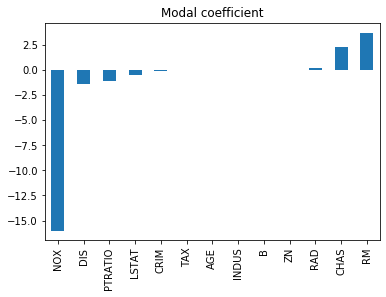

In [80]:
predictors= x_train.columns
coef = pd.Series(ridgereg.coef_, predictors).sort_values()
coef.plot(kind = 'bar',title = 'Modal coefficient')

In [81]:
# for this data, rodge reg is not giving good pred

# Lasso Regression / L1 regression

<img src= 'Lasso.webp'>
Similar to Ridge Regression, Lasso (Least Absolute Shrinkage and Selection Operator) also penalizes the absolute size of the regression coefficients. In addition, it is capable of reducing the variability and improving the accuracy of linear regression models.  Look at the equation below: Lasso regression differs from ridge regression in a way that it uses absolute values in the penalty function, instead of squares. This leads to penalizing (or equivalently constraining the sum of the absolute values of the estimates) values which causes some of the parameter estimates to turn out exactly zero. Larger the penalty applied, further the estimates get shrunk towards absolute zero. This results to variable selection out of given n variables.

Important Points:
The assumptions of lasso regression is same as least squared regression except normality is not to be assumed
Lasso Regression shrinks coefficients to zero (exactly zero), which certainly helps in feature selection
Lasso is a regularization method and uses l1 regularization
If group of predictors are highly correlated, lasso picks only one of them and shrinks the others to zero

In [ ]:
# eliminates less important variables

In [90]:
#alpha range=[0.01, 0.05, 0.5]

lassoreg = Lasso(alpha = 0.001, normalize = True)     # change alpha value 
lassoreg.fit(x_train, y_train)
pred = lassoreg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2= r2_score(y_test, pred)
print('rmse=', rmse,'r2=',r2)

rmse= 5.808077411724805 r2= 0.5857250414078969


In [98]:
df = pd.DataFrame(columns=['Linear reg', 'Ridge reg','Lasso reg'])

for i in range(len(ridgereg.coef_)):
    df= df.append({'Linear reg':reg.coef_[i], 'Ridge reg':ridgereg.coef_[i], 'Lasso reg':lassoreg.coef_[i]}, ignore_index= True)
    
df

,Linear reg,Ridge reg,Lasso reg
0,-0.119443,-0.119011,-0.111736
1,0.044780,0.044497,0.041836
2,0.005485,0.003907,-0.000000
3,2.340804,2.347657,2.336289
4,-16.123604,-15.999080,-15.299428
5,3.708709,3.714983,3.747444
6,-0.003121,-0.003232,-0.001773
7,-1.386397,-1.379994,-1.311913
8,0.244178,0.240552,0.209805
9,-0.010990,-0.010822,-0.009537


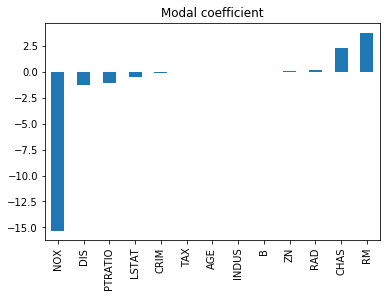

In [88]:
predictors= x_train.columns
coef = pd.Series(lassoreg.coef_, predictors).sort_values()
coef.plot(kind = 'bar',title = 'Modal coefficient')